In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [130]:
# opening of dataset
dataset = pd.read_excel("nez-opendata-20259-20250925.xlsx", header=0)
dataset

,ZavodniBroj,Grad,Opstina,Datum,Longitude,latitude,VrstaNezgode,VrstaStete,OpisNezgode
0,1510533,BEOGRAD,BARAJEVO,"05.01.2025,18:50",20366175,44619215.0,Sa mat.stetom,SN SA PARKIRANIM VOZILIMA,Ostali sudari sa parkiranim vozilom
1,1510854,BEOGRAD,BARAJEVO,"06.01.2025,16:30",20342381,44588294.0,Sa povredjenim,SN SA NAJMANjE DVA VOZILA – SKRETANjE ILI PREL...,Najmanje dva vozila koja se kreću istim putem ...
2,1508366,BEOGRAD,BARAJEVO,"06.01.2025,01:00",20351757,44604264.0,Sa mat.stetom,SN SA PARKIRANIM VOZILIMA,Sudar sa parkiranim vozilom sa leve strane kol...
3,1511079,BEOGRAD,BARAJEVO,"09.01.2025,13:05",20366297,44618967.0,Sa mat.stetom,SN SA NAJMANjE DVA VOZILA – SKRETANjE ILI PREL...,Najmanje dva vozila koja se kreću istim putem ...
4,1508796,BEOGRAD,BARAJEVO,"11.01.2025,02:30",2041314,44607341.0,Sa mat.stetom,SN SA JEDNIM VOZILOM,Nezgode sa učešćem jednog vozila i životinja
...,...,...,...,...,...,...,...,...,...
21253,1538939,ŠABAC,ŠABAC,"27.08.2025,08:55",19689135,44756496.0,Sa povredjenim,SN SA NAJMANjE DVA VOZILA – SKRETANjE ILI PREL...,Najmanje dva vozila koja se kreću različitim p...
21254,1539724,ŠABAC,ŠABAC,"31.08.2025,18:30",19678776,448082.0,Sa mat.stetom,SN SA JEDNIM VOZILOM,Nezgode sa učešćem jednog vozila i životinja
21255,1539742,ŠABAC,ŠABAC,"31.08.2025,22:45",19411258,44728636.0,Sa povredjenim,SN SA JEDNIM VOZILOM,Nezgoda sa jednim vozilom – silazak udesno sa ...
21256,1539627,ŠABAC,ŠABAC,"31.08.2025,00:30",19650933,44760395.0,Sa povredjenim,SN SA JEDNIM VOZILOM,Nezgoda sa jednim vozilom – silazak udesno sa ...


In [131]:
# Renaming and dropping unnecessary columns and creating a copy of original dataset
working_set = dataset.copy()
working_set = working_set.drop(columns="Datum")
working_set.rename(columns={"Datum1":"Datum", "Longitude":"longitude"}, inplace = True)
working_set.columns

Index(['ZavodniBroj', 'Grad', 'Opstina', 'longitude', 'latitude',
       'VrstaNezgode', 'VrstaStete', 'OpisNezgode'],
      dtype='object')

In [132]:
# checking information of set
working_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21258 entries, 0 to 21257
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ZavodniBroj   21258 non-null  int64  
 1   Grad          21258 non-null  object 
 2   Opstina       21258 non-null  object 
 3   longitude     21258 non-null  object 
 4   latitude      21258 non-null  float64
 5   VrstaNezgode  21258 non-null  object 
 6   VrstaStete    21258 non-null  object 
 7   OpisNezgode   21258 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.3+ MB


In [133]:
# unique accidents and number for each, also creating variable for bar plot

counting = working_set["VrstaNezgode"].value_counts()
counting

VrstaNezgode
Sa mat.stetom     12598
Sa povredjenim     8366
Sa poginulim        294
Name: count, dtype: int64

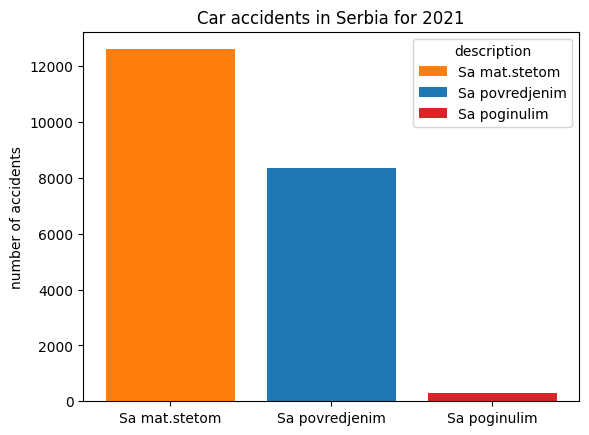

In [135]:
# simple bar plot for different type of car accidents

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
bar_labels = working_set["VrstaNezgode"].unique()
bar_colors = ['tab:orange', 'tab:blue', 'tab:red']

ax.bar(bar_labels, counting, label=bar_labels, color=bar_colors)

ax.set_ylabel('number of accidents')
ax.set_title('Car accidents in Serbia for 2021')
ax.legend(title='description')

plt.show()

In [136]:
# --- Convert Excel-style coords (e.g., "20,366,175") to decimal degrees ---
def excel_to_degrees(series: pd.Series) -> pd.Series:
    # keep only digits and minus, drop commas/spaces etc.
    digits = series.astype(str).str.replace(r"[^0-9\-]", "", regex=True)
    vals = pd.to_numeric(digits, errors="coerce") / 1_000_000.0
    return vals

lon = excel_to_degrees(working_set["longitude"])
lat = excel_to_degrees(working_set["latitude"])

In [137]:
# Optional: keep only plausible Serbia bounds to drop bad rows like "2,041,314" -> 2.041314
serbia_mask = lon.between(18, 23) & lat.between(42, 47)
lon = lon[serbia_mask]
lat = lat[serbia_mask]

print("Valid points:", len(lon), "lon range:", lon.min(), "→", lon.max(), "lat range:", lat.min(), "→", lat.max())


Valid points: 1222 lon range: 18.867328 → 22.600998 lat range: 42.29765 → 46.16668


In [139]:
# --- Bounding box from converted coordinates ---
pad_lon, pad_lat = 0.05, 0.05
bbox = (lon.min() - pad_lon, lon.max() + pad_lon, lat.min() - pad_lat, lat.max() + pad_lat)


In [140]:
# --- Load background map ---
img = mpimg.imread("map.png")  # ensure correct path

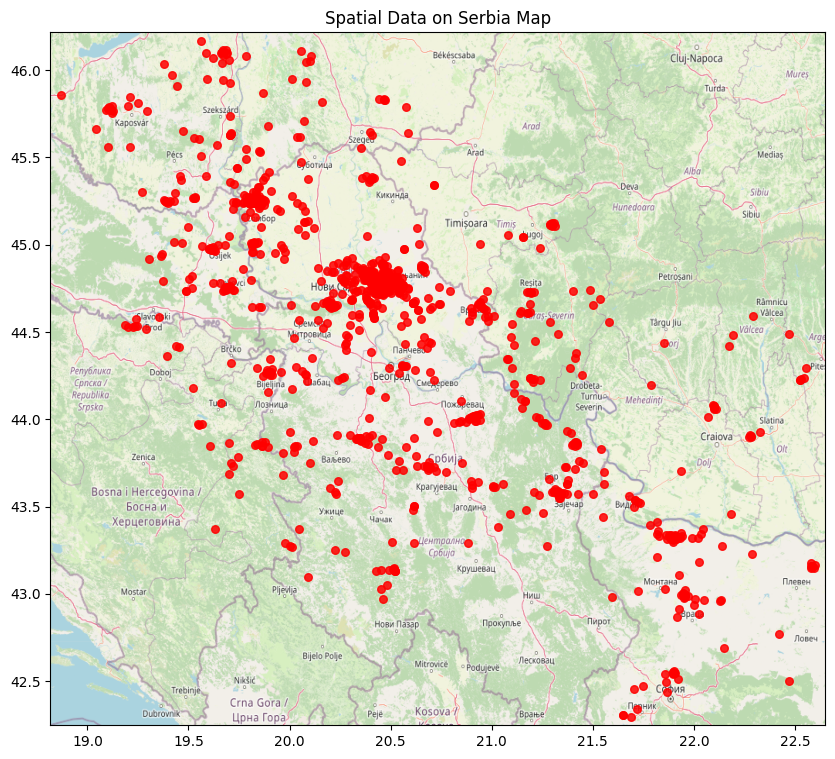

1222 18.867328 22.600998 42.29765 46.16668


In [141]:
# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 9))
ax.imshow(img, extent=bbox, aspect="auto", zorder=0)
ax.scatter(lon.to_numpy(), lat.to_numpy(), s=30, c="red", alpha=0.85, zorder=1)

ax.set_title("Spatial Data on Serbia Map")
ax.set_xlim(bbox[0], bbox[1])
ax.set_ylim(bbox[2], bbox[3])
plt.show()

print(len(lon), lon.min(), lon.max(), lat.min(), lat.max())